In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(); 
from scipy.stats import probplot, ttest_ind, chi2_contingency

In [2]:
data = pd.read_csv('train.csv')
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Hypothesis testing 1 : children vs others and probability of surviving

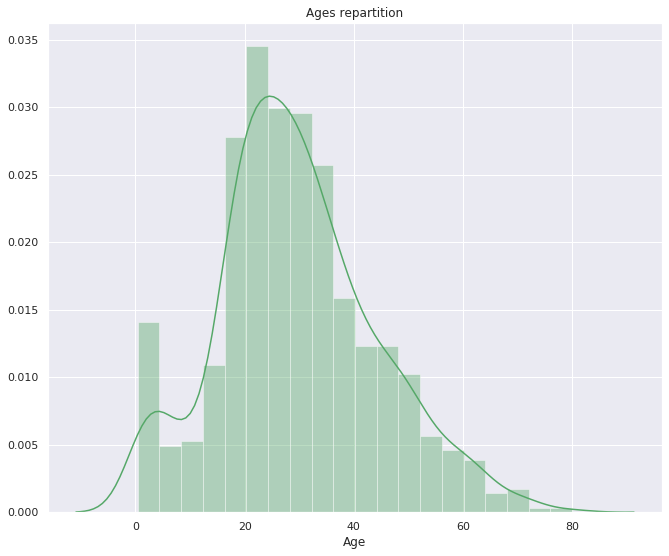

In [3]:
f, ax = plt.subplots(figsize=(11, 9))

no_nans=data.loc[data['Age'].notnull(),'Age']
sns.distplot(no_nans,ax=ax, color="g")
ax.set_title("Ages repartition")

data.dropna(inplace=True)

We need to discretize our age variable in order to perform hypothesis testing on it.

In [4]:
data['binarize_age'] = pd.cut(data['Age'], bins=[0,18,100])

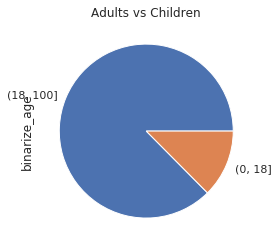

In [15]:
data['binarize_age'].value_counts().plot(kind='pie', title='Adults vs Children')
age = data['binarize_age'].cat.codes

In [7]:
ttest_ind(age,data.Survived)

Ttest_indResult(statistic=4.746351030135237, pvalue=2.98159729203779e-06)

We define a null hypothesis of independance between the fact of being a children and the probabilty of surviving. And here we can observe a very low p-value, thus we reject H0 and the independance between age and the probabilty of surviving.

## Hypothesis testing 2 : sex and probability of surviving

In [16]:
sex = data['Sex'].astype('category').cat.codes

In [17]:
ttest_ind(sex, data.Survived)

Ttest_indResult(statistic=-3.0108655414626977, pvalue=0.0027868731798734417)

As before, we define a null hypothesis of independance between the sex and the probabilty of surviving. And here we can observe a very low p-value, thus we reject H0 and the hypothesis of independance.

## Hypothesis testing 3 : fare and probability of surviving

In [18]:
data['Fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

We have to discretize the fare variable in order to be able to use it.

In [20]:
data['binarize_fare'] = pd.cut(data['Fare'], bins=[0,60,515])
bin_fare = data['binarize_fare'].cat.codes 

To perform the chi2 contingency test, we need to build a contingency table.

In [21]:
cross = pd.crosstab(index=bin_fare,rownames=['Fare'],
            columns=data['Survived'])
cross.drop(-1, axis=0)

Survived,0,1
Fare,,
0,35,58
1,23,65


In [12]:
g, p, dof, expctd = chi2_contingency(cross)
g, p

(6.8578733340485885, 0.03242139719108936)

Again, we define a null hypothesis of independance between the fare and the probabilty of surviving. And here we can observe a very low p-value, thus we reject H0 and the hypothesis of independance.